In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import seaborn as sns
from math import sqrt
from matplotlib import pyplot as plt
%matplotlib inline

## EDA

In [2]:
df = pd.read_csv('brain_stroke.csv')

 ## Data preparation

In [3]:
#@ INSPECTING DATAFRAME:
print(df.shape)

(4981, 11)


In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [5]:
df.columns = df.columns.str.lower()
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [9]:
#is there any missing values
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
numerical = ['age','avg_glucose_level', 'bmi']

/tmp/ipykernel_9205/1770147926.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax=ax, layout=(3, 3), column=['gender', 'age', 'ever_married',


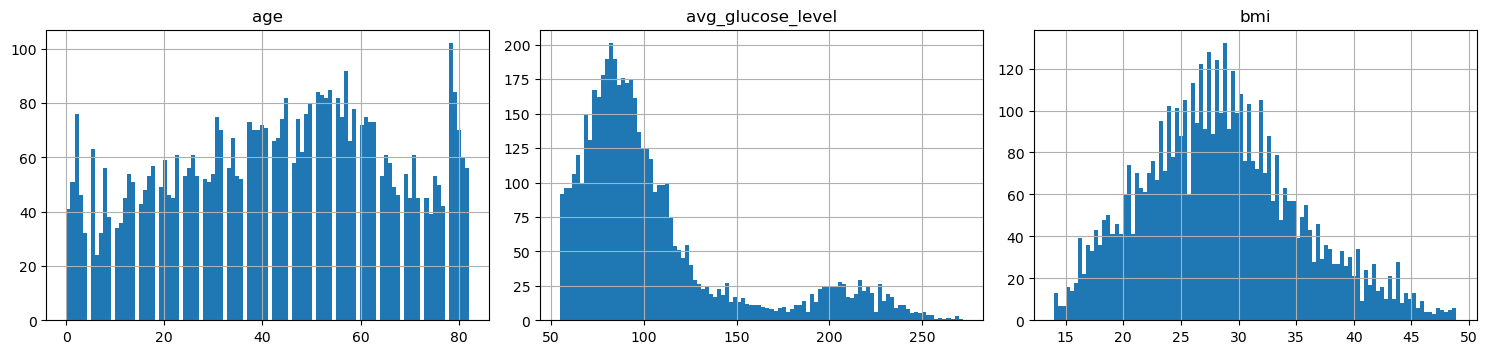

In [12]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df.hist(bins=100, ax=ax, layout=(3, 3), column=['gender', 'age', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])
plt.tight_layout()
plt.show()

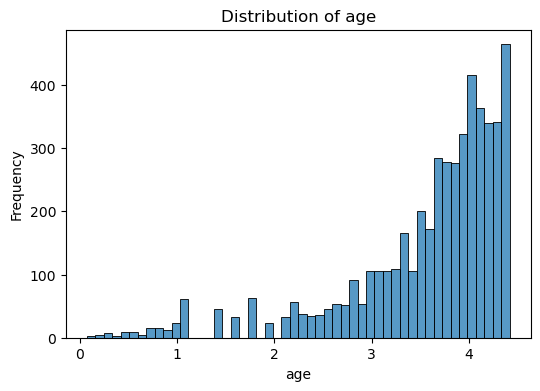

In [13]:
pop = np.log1p(df.age) 
plt.figure(figsize=(6, 4))
sns.histplot(pop, bins=50)
plt.ylabel('Frequency')
plt.xlabel('age')
plt.title('Distribution of age')

plt.show()

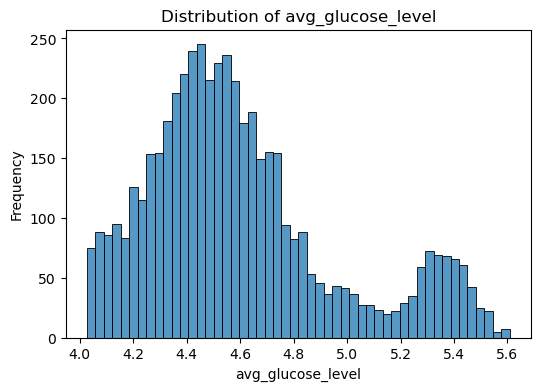

In [14]:
pop = np.log1p(df.avg_glucose_level) 
plt.figure(figsize=(6, 4))
sns.histplot(pop, bins=50)
plt.ylabel('Frequency')
plt.xlabel('avg_glucose_level')
plt.title('Distribution of avg_glucose_level')

plt.show()

In [15]:
## let's make log

df.age = np.log1p(df.age)

In [16]:
#let's create the correlation matrix

#df_train_full[numerical].corrwith(df_train_full.churn).to_frame('correlation')
corrMatrix = df.corr()
print(corrMatrix)

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.222129       0.190520           0.186970   
hypertension       0.222129      1.000000       0.111974           0.170028   
heart_disease      0.190520      0.111974       1.000000           0.166847   
avg_glucose_level  0.186970      0.170028       0.166847           1.000000   
bmi                0.474601      0.158762       0.060926           0.186348   
stroke             0.176922      0.131965       0.134610           0.133227   

                        bmi    stroke  
age                0.474601  0.176922  
hypertension       0.158762  0.131965  
heart_disease      0.060926  0.134610  
avg_glucose_level  0.186348  0.133227  
bmi                1.000000  0.056926  
stroke             0.056926  1.000000  


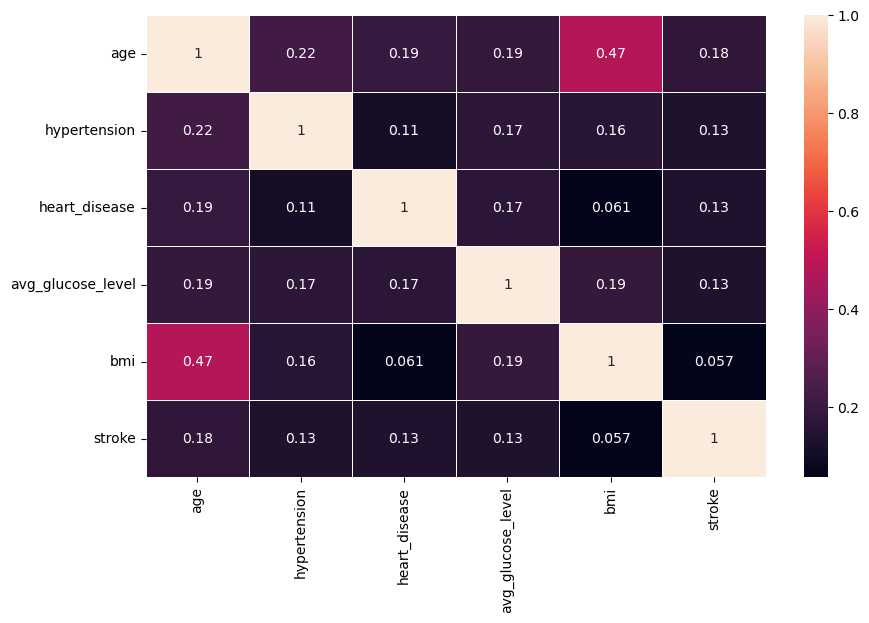

In [17]:
plt.figure(figsize=(10,6)) 
sns.heatmap(corrMatrix, annot=True,linewidths=.5,)
plt.show()

In [18]:
corrMatrix[corrMatrix< 1].unstack().transpose().sort_values( ascending=False).drop_duplicates()

bmi                age                  0.474601
age                hypertension         0.222129
heart_disease      age                  0.190520
avg_glucose_level  age                  0.186970
                   bmi                  0.186348
age                stroke               0.176922
avg_glucose_level  hypertension         0.170028
heart_disease      avg_glucose_level    0.166847
hypertension       bmi                  0.158762
heart_disease      stroke               0.134610
avg_glucose_level  stroke               0.133227
hypertension       stroke               0.131965
heart_disease      hypertension         0.111974
                   bmi                  0.060926
bmi                stroke               0.056926
age                age                       NaN
dtype: float64

In [19]:
df['age'].mean()

3.5645947673422347

In [20]:
df['bmi'].mean()

28.498173057619002

In [21]:
#most frequent
df['age'].value_counts().idxmax()

4.3694478524670215

In [22]:
df['bmi'].value_counts().idxmax()

28.7

In [23]:
df['heart_disease'].value_counts().idxmax()

0

## Splitting the data

In [24]:
# split into full train 80% and 20% for test or train/val/test sets, with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42) 
# split full train into train and val 20% of 80 % - 1/4=25%
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [25]:
len(df_train), len(df_val), len(df_test)

(2988, 996, 997)

In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

In [27]:
# only 5% of people had stroke
df_train_full.stroke.value_counts(normalize = True)

0    0.951305
1    0.048695
Name: stroke, dtype: float64

## Looking into different groups

In [28]:
df_train_full[categorical].nunique()

gender            2
hypertension      2
heart_disease     2
ever_married      2
work_type         4
residence_type    2
smoking_status    4
dtype: int64

In [29]:
df_train_full[df_train_full.gender == 'Female'].stroke.mean()

0.045689655172413794

In [30]:
df_train_full[df_train_full.gender == 'Male'].stroke.mean()

0.052884615384615384

In [31]:
global_stroke_rate = df_train_full.stroke.value_counts(normalize = True)
global_stroke_rate

0    0.951305
1    0.048695
Name: stroke, dtype: float64

In [32]:
df_train_full[df_train_full.ever_married == 'Yes'].stroke.mean()

0.06572411157814291

In [33]:
df_train_full[df_train_full.ever_married == 'No'].stroke.mean()

0.016093635698610095

## Risk ratio

In [34]:
del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

## Logistic regression


In [35]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter = 1000)
    model.fit(X, y)

    return dv, model

In [36]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [37]:
dv, model = train(df_train, y_train, C = 40)
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)

In [38]:
round(auc, 3)

0.803

In [39]:
auc = roc_auc_score(y_val, y_pred)

In [40]:
print(auc)

0.8027628308002139


In [41]:
accuracy_score(y_val, y_pred >= 0.5)

0.9668674698795181

In [42]:
thresholds = np.linspace(0, 1, 101) #np.linspace(0, 0+(0.01*101),101,endpoint=False)
scores = []
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <= t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    
#        print(type(tp), type(fp), tp, fp)
    if (tp + fp) > 0 :
        precision = tp / (tp + fp)
    else:
        precision = 0.
        
    if (tp + fn) > 0 :

        recall = tp / (tp + fn)
    else:
        recall = 0.
        
    if (precision == recall):
        print(t)
    
    scores.append((t, tp, fp, fn, tn, acc, precision, recall ))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'acc', 'precision', 'recall' ] 
    
#df_scores
 

0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42
0.43
0.44
0.45
0.46
0.47000000000000003
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.96
0.97
0.98
0.99
1.0


In [43]:
thresholds = np.linspace(0, 1, 5) #np.linspace(0, 0+(0.01*101),101,endpoint=False)
scores = []
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <= t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    if (tp + fp) > 0 :
        precision = tp / (tp + fp)
    else:
        precision = 0.
        
    if (tp + fn) > 0 :

        recall = tp / (tp + fn)
    else:
        recall = 0.
    if (precision == recall):
        print(t)
    
    scores.append((t, tp, fp, fn, tn, acc, precision, recall ))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'acc', 'precision', 'recall' ] 
    
#df_scores

0.5
0.75
1.0


In [44]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.033
0.05 0.721
0.10 0.837
0.15 0.896
0.20 0.933
0.25 0.948
0.30 0.961
0.35 0.965
0.40 0.966
0.45 0.967
0.50 0.967
0.55 0.967
0.60 0.967
0.65 0.967
0.70 0.967
0.75 0.967
0.80 0.967
0.85 0.967
0.90 0.967
0.95 0.967
1.00 0.967


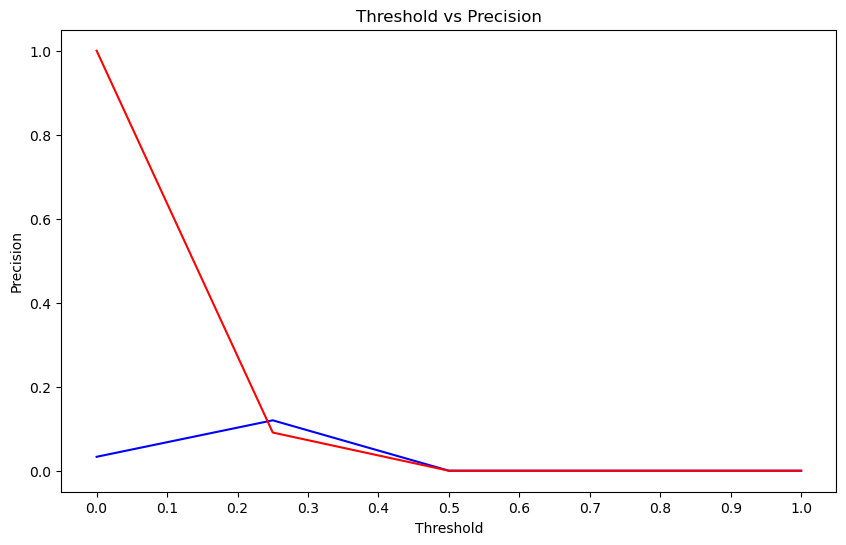

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(df_scores.threshold, df_scores.precision, color='blue')
plt.plot(df_scores.threshold, df_scores.recall, color='red')

plt.title('Threshold vs Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

In [46]:
scores = []

thresholds = np.linspace(0, 1, 101)
for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [47]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

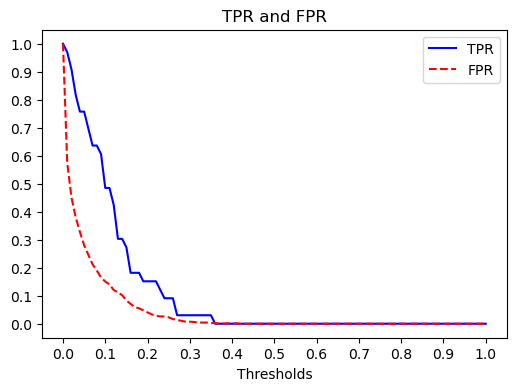

In [48]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='blue', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='red', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

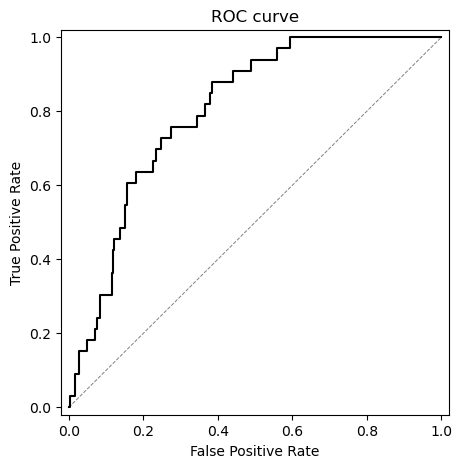

In [50]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [51]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 40 ,80 ,100]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.stroke.values
        y_val = df_val.stroke.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.472 ± 0.022
C=0.01, auc = 0.601 ± 0.027
C=0.1, auc = 0.753 ± 0.034
C=0.5, auc = 0.814 ± 0.033
C=1, auc = 0.828 ± 0.031
C=5, auc = 0.836 ± 0.029
C=10, auc = 0.837 ± 0.029
C=40, auc = 0.838 ± 0.028
C=80, auc = 0.837 ± 0.028
C=100, auc = 0.837 ± 0.028


In [52]:
auc(df_scores.fpr, df_scores.tpr)

TypeError: 'numpy.float64' object is not callable

In [54]:
## Full train
#y_train = df_train_full.stroke.values
#y_test = df_test.stroke.values

dv, model = train(df_train_full, y_train, C=40)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

ValueError: Found input variables with inconsistent numbers of samples: [3984, 3188]

In [55]:
thresholds = np.linspace(0, 1, 5) #np.linspace(0, 0+(0.01*101),101,endpoint=False)
scores = []
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <= t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2.*precision*recall /(precision + recall)
    
    scores.append((t, tp, fp, fn, tn, precision, recall, f1 ))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall' ,'f1' ] 
    
df_scores

/tmp/ipykernel_9205/1981091204.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/tmp/ipykernel_9205/1981091204.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)
/tmp/ipykernel_9205/1981091204.py:17: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


,threshold,tp,fp,fn,tn,precision,recall,f1
0,0.00,40,756,0,0,0.050251,1.000,0.095694
1,0.25,3,4,37,752,0.428571,0.075,0.127660
2,0.50,0,0,40,756,NaN,0.000,NaN
3,0.75,0,0,40,756,NaN,0.000,NaN
4,1.00,0,0,40,756,NaN,0.000,NaN


## Random Forest

In [56]:
#Use DictVectorizer to turn the dataframe into matrices.

#Do train/validation/test split with 60%/20%/20% distribution.

#Use the train_test_split function and set the random_state parameter to 1.

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values


del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [57]:
dv.get_feature_names_out()

array(['age', 'avg_glucose_level', 'bmi', 'ever_married=No',
       'ever_married=Yes', 'gender=Female', 'gender=Male',
       'heart_disease', 'hypertension', 'residence_type=Rural',
       'residence_type=Urban', 'smoking_status=Unknown',
       'smoking_status=formerly smoked', 'smoking_status=never smoked',
       'smoking_status=smokes', 'work_type=Govt_job', 'work_type=Private',
       'work_type=Self-employed', 'work_type=children'], dtype=object)

In [64]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.722454920414658

In [65]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6688683921298192

In [66]:
print(export_text(dt, feature_names = dv.get_feature_names()))

|--- age <= 4.23
|   |--- class: 0
|--- age >  4.23
|   |--- class: 0



/home/solo/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
print(export_text(dt, feature_names = dv.get_feature_names()))

|--- age <= 4.23
|   |--- age <= 3.90
|   |   |--- age <= 3.82
|   |   |   |--- class: 0
|   |   |--- age >  3.82
|   |   |   |--- class: 0
|   |--- age >  3.90
|   |   |--- avg_glucose_level <= 101.39
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  101.39
|   |   |   |--- class: 0
|--- age >  4.23
|   |--- bmi <= 44.85
|   |   |--- avg_glucose_level <= 123.81
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  123.81
|   |   |   |--- class: 0
|   |--- bmi >  44.85
|   |   |--- class: 1



/home/solo/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [69]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [70]:
y_pred = rf.predict(X_val)

In [71]:
scores = []
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf =s )
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,s, auc))

In [72]:
#let's look at the in_samples_leaf
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf =s )
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('(%4s, %3d) -> %3.f' % (d,s, auc))

(   4,   1) ->   1
(   4,   2) ->   1
(   4,   5) ->   1
(   4,  10) ->   1
(   4,  15) ->   1
(   4,  20) ->   1
(   4, 100) ->   1
(   4, 200) ->   1
(   4, 500) ->   1
(   5,   1) ->   1
(   5,   2) ->   1
(   5,   5) ->   1
(   5,  10) ->   1
(   5,  15) ->   1
(   5,  20) ->   1
(   5, 100) ->   1
(   5, 200) ->   1
(   5, 500) ->   1
(   6,   1) ->   1
(   6,   2) ->   1
(   6,   5) ->   1
(   6,  10) ->   1
(   6,  15) ->   1
(   6,  20) ->   1
(   6, 100) ->   1
(   6, 200) ->   1
(   6, 500) ->   1


In [73]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns = columns )
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.750706
1,4,2,0.744995
2,4,5,0.728811
3,4,10,0.728584
4,4,15,0.713930
5,4,20,0.729026
6,4,100,0.747021
7,4,200,0.768097
8,4,500,0.769681
9,5,1,0.720212


In [74]:
#let's create the table
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns =['max_depth'], values = ['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.751  0.720  0.719
2                 0.745  0.711  0.721
5                 0.729  0.715  0.682
10                0.729  0.714  0.677
15                0.714  0.706  0.703
20                0.729  0.703  0.710
100               0.747  0.743  0.743
200               0.768  0.768  0.768
500               0.770  0.770  0.770

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

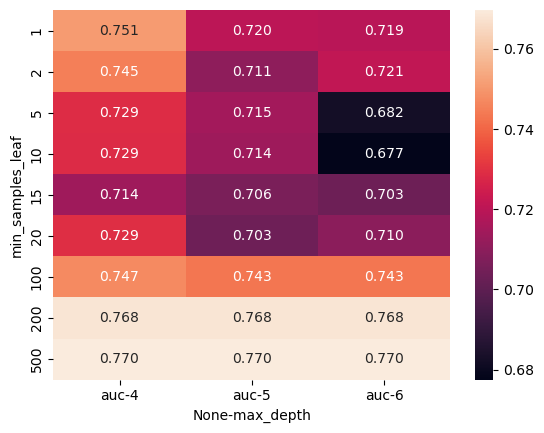

In [75]:
sns.heatmap(df_scores_pivot, annot = True, fmt = '.3f')

## best auc - min_samples_leaf = 400; max_depth = 4;

In [76]:
#final model Decision Tree Classifier

dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 400)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc: %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('validation auc: %.3f' % auc)

train auc: 0.839
validation auc: 0.784


## RandomForestClassifier

In [78]:
# model fit number of estimators
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append((i,auc))

10 -> 0.663
20 -> 0.688
30 -> 0.718
40 -> 0.736
50 -> 0.753
60 -> 0.757
70 -> 0.758
80 -> 0.772
90 -> 0.772
100 -> 0.773
110 -> 0.773
120 -> 0.773
130 -> 0.771
140 -> 0.768
150 -> 0.765
160 -> 0.765
170 -> 0.765
180 -> 0.764
190 -> 0.763
200 -> 0.765


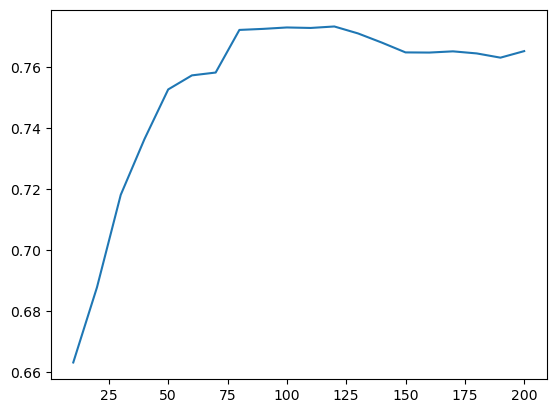

In [79]:
df_scores = pd.DataFrame(aucs, columns = ['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators,df_scores.auc )

## n_estimators=70

In [87]:
all_aucs = {}

for depth in [3, 5, 10, 20]:
    print('depth: %s' % depth)
    aucs = []
    score = []
    for i in range(10, 501, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append((depth, i, auc))
        score.append(auc)
    all_aucs[depth] = score
    print()

depth: 3
10 -> 0.779
20 -> 0.791
30 -> 0.796
40 -> 0.791
50 -> 0.786
60 -> 0.785
70 -> 0.785
80 -> 0.783
90 -> 0.784
100 -> 0.784
110 -> 0.785
120 -> 0.784
130 -> 0.782
140 -> 0.783
150 -> 0.783
160 -> 0.782
170 -> 0.783
180 -> 0.783
190 -> 0.782
200 -> 0.781
210 -> 0.782
220 -> 0.782
230 -> 0.782
240 -> 0.781
250 -> 0.781
260 -> 0.782
270 -> 0.783
280 -> 0.783
290 -> 0.783
300 -> 0.784
310 -> 0.784
320 -> 0.785
330 -> 0.784
340 -> 0.784
350 -> 0.784
360 -> 0.784
370 -> 0.784
380 -> 0.784
390 -> 0.784
400 -> 0.784
410 -> 0.784
420 -> 0.783
430 -> 0.784
440 -> 0.784
450 -> 0.784
460 -> 0.783
470 -> 0.784
480 -> 0.784
490 -> 0.784
500 -> 0.784

depth: 5
10 -> 0.778
20 -> 0.779
30 -> 0.786
40 -> 0.789
50 -> 0.785
60 -> 0.788
70 -> 0.789
80 -> 0.790
90 -> 0.789
100 -> 0.791
110 -> 0.790
120 -> 0.789
130 -> 0.788
140 -> 0.790
150 -> 0.791
160 -> 0.791
170 -> 0.791
180 -> 0.791
190 -> 0.791
200 -> 0.791
210 -> 0.791
220 -> 0.791
230 -> 0.792
240 -> 0.791
250 -> 0.792
260 -> 0.791
270 -> 0.79

In [82]:
df_scores = pd.DataFrame(aucs, columns = ['max_depth','n_estimators', 'auc'])

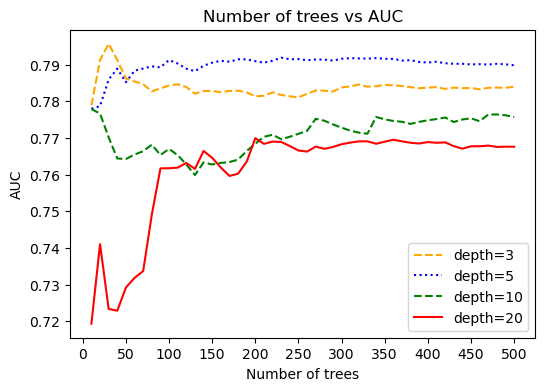

In [88]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 501, 10))

plt.plot(num_trees, all_aucs[3], label='depth=3', color='orange', linestyle='dashed')
plt.plot(num_trees, all_aucs[5], label='depth=5', color='blue', linestyle='dotted')
plt.plot(num_trees, all_aucs[10], label='depth=10', color='green', linestyle='dashed')
plt.plot(num_trees, all_aucs[20], label='depth=20', color='red', linestyle='solid')
    
plt.xticks(range(0, 501, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

# max_depth =5, num_trees=150